<a href="https://colab.research.google.com/github/jackminchin/UKVAR/blob/main/VAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import and process the interest rate data.
interest_rate = pd.read_csv('data/interest_rate.csv')
interest_rate['Date Changed'] = pd.to_datetime(interest_rate['Date Changed'])
interest_rate.index = interest_rate['Date Changed']
interest_rate.drop(labels=['Date Changed'], axis=1, inplace=True)
interest_rate = interest_rate.resample('Q').mean()
interest_rate.index = pd.PeriodIndex(interest_rate.index, freq='Q')


# Import and process the GDP data.
gdp = pd.read_csv('data/gdp.csv', header=80)
gdp.columns = ['date', 'GDP']
gdp[['year', 'quarter']] = gdp.date.str.split('Q', expand=True)
gdp['date'] = gdp['year'].str.strip() + 'Q' + gdp['quarter']
gdp.index = pd.to_datetime(gdp['date']).dt.to_period('Q')
gdp.head()

# Investment 
investment = pd.read_csv('data/cxnv.csv')
investment[['year', 'quarter']] = investment['date'].str.split('Q', expand=True)
investment['date'] = investment['year'].str.strip() + 'Q' + investment['quarter']
investment = investment[['date', 'Bus Inv exc. exceptional transfer: CVM NSA']]
#investment['date2'] = pd.to_datetime(gdp['date']).dt.to_period('Q')
investment.dropna(inplace=True)
investment.index = pd.to_datetime(investment['date']).dt.to_period('Q')
investment.drop(labels=['date'], axis=1, inplace=True)
investment.columns = ['Investment']


df = gdp.join(interest_rate)
df = df.join(investment)
df.drop(labels=['date',  'year', 'quarter'], axis=1, inplace=True)
df.dropna(inplace=True)

df.head()


# Bivariate VAR of Income and Interest Rates

,GDP,Rate,Investment
date,,,
1997Q2,235563,6.375,34610.0
1997Q3,242589,6.875,36294.0
1997Q4,239613,7.250,39342.0
1998Q2,246876,7.500,38422.0
1998Q4,256856,6.750,42212.0


In [37]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

data = np.log(df).diff().dropna()
model = VAR(data)
results = model.fit(2)

results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 24, Nov, 2020
Time:                     15:46:35
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -13.6087
Nobs:                     32.0000    HQIC:                  -14.2517
Log likelihood:           117.911    FPE:                4.80223e-07
AIC:                     -14.5706    Det(Omega_mle):     2.65277e-07
--------------------------------------------------------------------
Results for equation GDP
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.017861         0.012277            1.455           0.146
L1.GDP               -0.238794         0.263946           -0.905           0.366
L1.Rate              -0.116041         0.042309           -2.7

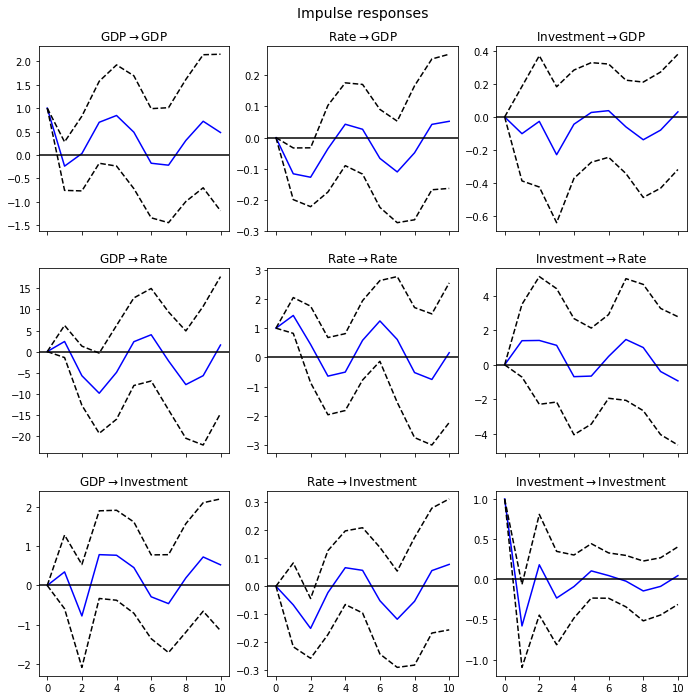

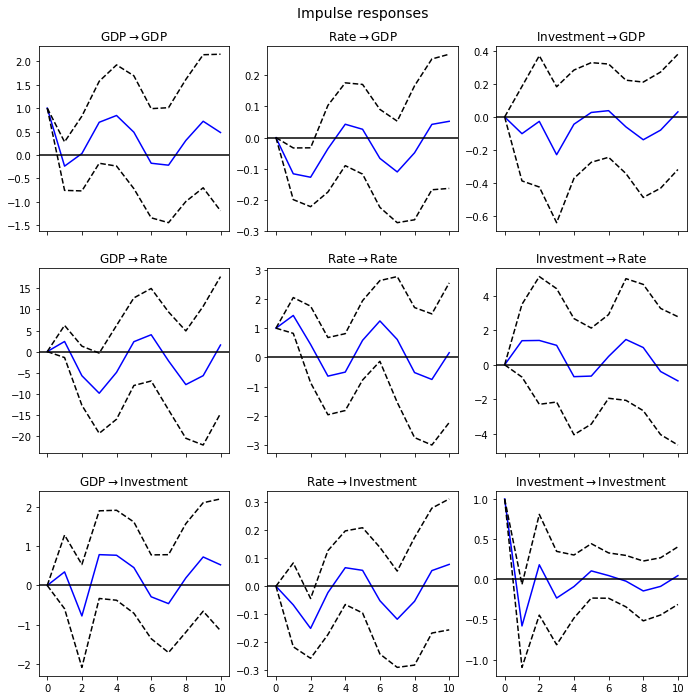

In [38]:
results.irf(10).plot()